In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
DATE_COLS = [
    "Auftragseingang",
    "Auftragsende_SOLL",
    "AFO_Start_SOLL",
    "AFO_Ende_SOLL",
    "AFO_Start_IST",
    "AFO_Ende_IST",
    "AFO_Start_IST_Erster",
    "AFO_Ende_IST_Letzter",
]

data = pd.read_csv(
    "../data/processed/data_feature_3.csv",
    sep=",",
    parse_dates=DATE_COLS,
    low_memory=False,
)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528238 entries, 0 to 1528237
Data columns (total 27 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   AuftragsID                  1528238 non-null  object        
 1   BauteilID                   1528238 non-null  int64         
 2   Bauteilbezeichnung          1528238 non-null  object        
 3   Auftragseingang             1528238 non-null  datetime64[ns]
 4   Priorität                   1528238 non-null  int64         
 5   Auftragsende_SOLL           1528238 non-null  datetime64[ns]
 6   Arbeitsschritt              1528238 non-null  int64         
 7   Arbeitsschrittbezeichnung   1528238 non-null  object        
 8   AFO_Start_SOLL              1528238 non-null  datetime64[ns]
 9   AFO_Ende_SOLL               1528238 non-null  datetime64[ns]
 10  AFO_Start_IST               1528238 non-null  datetime64[ns]
 11  AFO_Ende_IST            

In [5]:
data.head(100)

,AuftragsID,BauteilID,Bauteilbezeichnung,Auftragseingang,Priorität,Auftragsende_SOLL,Arbeitsschritt,Arbeitsschrittbezeichnung,AFO_Start_SOLL,AFO_Ende_SOLL,...,AFO_Dauer_SOLL_Stunden,AFO_Dauer_IST_Stunden,AFO_Verspätung_Arbeitszeit,Start_Delay_Arbeitszeit,End_Delay_Arbeitszeit,AFO_Erster_Schritt,AFO_Letzter_Schritt,AFO_Start_IST_Erster,AFO_Ende_IST_Letzter,Auftrags_Laufzeit_IST_Tage
0,95a859f51cf541e0b4aed3a38bb93065,1,Steuerventilmodul,2013-09-20,1,2014-01-01 11:32:00,1,Info,2014-01-01 07:00:00,2014-01-01 07:01:00,...,0.016667,0.016667,0.000000,0.0,0.000000,1,999,2014-01-01 07:00:00,2014-05-07 12:19:00,126.221528
1,ed4e40cb93c04d0f9bcb8f7ecdc8752a,1,Steuerventilmodul,2013-11-09,1,2014-01-01 11:32:00,1,Info,2014-01-01 07:00:00,2014-01-01 07:01:00,...,0.016667,0.016667,0.000000,0.0,0.000000,1,999,2014-01-01 07:00:00,2014-05-08 08:21:00,127.056250
2,ce233ad078b9429b8bd40f09100e8ee0,1,Steuerventilmodul,2013-12-30,1,2014-01-01 11:32:00,1,Info,2014-01-01 07:00:00,2014-01-01 07:01:00,...,0.016667,0.016667,0.000000,0.0,0.000000,1,999,2014-01-01 07:00:00,2014-05-07 13:15:00,126.260417
3,c6b0430e1b7b4f328f0ac195c3070390,1,Steuerventilmodul,2013-10-05,1,2014-01-01 11:32:00,1,Info,2014-01-01 07:00:00,2014-01-01 07:01:00,...,0.016667,0.016667,0.000000,0.0,0.000000,1,999,2014-01-01 07:00:00,2014-05-07 13:20:00,126.263889
4,5a5b4b41d6d246cfbe862018b557702b,1,Steuerventilmodul,2013-07-27,1,2014-01-01 11:32:00,1,Info,2014-01-01 07:00:00,2014-01-01 07:01:00,...,0.016667,0.016667,0.000000,0.0,0.000000,1,999,2014-01-01 07:00:00,2014-05-07 12:14:00,126.218056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20f20431e1ff4fa598eb011c0ca61981,1,Steuerventilmodul,2013-08-04,1,2014-01-01 13:12:00,11,Heften-Schweißen,2014-01-01 07:31:00,2014-01-01 08:21:00,...,0.833333,0.950000,0.116667,0.0,0.116667,1,999,2014-01-01 07:00:00,2014-05-07 13:17:00,126.261806
96,35790e743a4c4fa2967e3c1c3f2bd3b8,2,Schwenkzylinder,2013-07-27,2,2014-01-01 13:12:00,12,Richten,2014-01-01 07:31:00,2014-01-01 08:21:00,...,0.833333,1.000000,0.166667,0.0,0.166667,1,999,2014-01-01 07:00:00,2014-01-01 13:40:00,0.277778
97,e1f177458ea84d6b9b33813a21ef95ad,1,Steuerventilmodul,2013-08-02,2,2014-01-01 12:22:00,11,Heften-Schweißen,2014-01-01 07:31:00,2014-01-01 08:21:00,...,0.833333,1.016667,0.183333,0.0,0.183333,1,999,2014-01-01 07:00:00,2014-01-01 12:32:00,0.230556
98,c6b0430e1b7b4f328f0ac195c3070390,1,Steuerventilmodul,2013-10-05,1,2014-01-01 11:32:00,11,Heften-Schweißen,2014-01-01 07:31:00,2014-01-01 08:21:00,...,0.833333,1.050000,0.216667,0.0,0.216667,1,999,2014-01-01 07:00:00,2014-05-07 13:20:00,126.263889


# Weekday Analyse

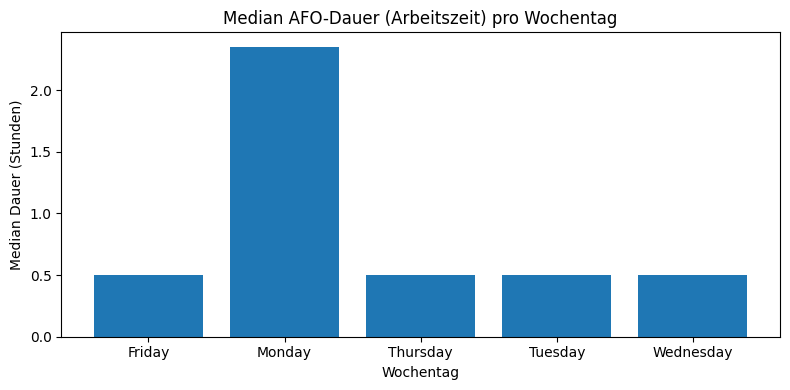

,median,mean,count
Wochentag,,,
Friday,0.50,0.663592,319653
Monday,2.35,1.987237,171459
Thursday,0.50,0.669320,326235
Tuesday,0.50,0.676714,363687
Wednesday,0.50,0.668676,347204


In [6]:
# Wochentage vergleichen
data["Wochentag"] = data["AFO_Start_IST"].dt.day_name()

# 2) Arbeitszeit berechnen
overview = data.groupby("Wochentag")["AFO_Dauer_IST_Stunden"].agg(
    median="median",
    mean="mean",
    count="count"
).sort_index()


plt.figure(figsize=(8,4))
plt.bar(overview.index, overview["median"])  #
plt.title("Median AFO-Dauer (Arbeitszeit) pro Wochentag")
plt.xlabel("Wochentag")
plt.ylabel("Median Dauer (Stunden)")
plt.tight_layout()
plt.show()

overview

Montags dauern die AFOs VIEL LÄNGER

In [7]:
dauer_pro_tag_schritt = (
    data.groupby(["Wochentag", "Arbeitsschrittbezeichnung"])["AFO_Dauer_IST_Stunden"]
    .sum()
    .reset_index()
)

dauer_pro_tag_schritt = dauer_pro_tag_schritt.sort_values(
    by=["Wochentag", "AFO_Dauer_IST_Stunden"],
    ascending=[True, False]
)

top10_je_tag = (
    dauer_pro_tag_schritt.groupby("Wochentag")
    .head(10)
    .reset_index(drop=True)
)

print(top10_je_tag)

    Wochentag Arbeitsschrittbezeichnung  AFO_Dauer_IST_Stunden
0      Friday                 Transport           71354.000000
1      Friday                Aufspannen           24765.166667
2      Friday          Heften-Schweißen           21104.850000
3      Friday    Abspannen-Nacharbeiten           19227.433333
4      Friday     Mechanisch Bearbeiten           17566.400000
5      Friday                   Richten           17286.900000
6      Friday             Nachschweißen           16134.466667
7      Friday                 Schweißen           14708.033333
8      Friday       manuelle Nacharbeit            5713.733333
9      Friday      Verputzen-Aufspannen            1621.066667
10     Monday                 Transport          173552.233333
11     Monday          Heften-Schweißen           39911.300000
12     Monday                   Richten           25778.300000
13     Monday                 Schweißen           21990.200000
14     Monday                Aufspannen           21599

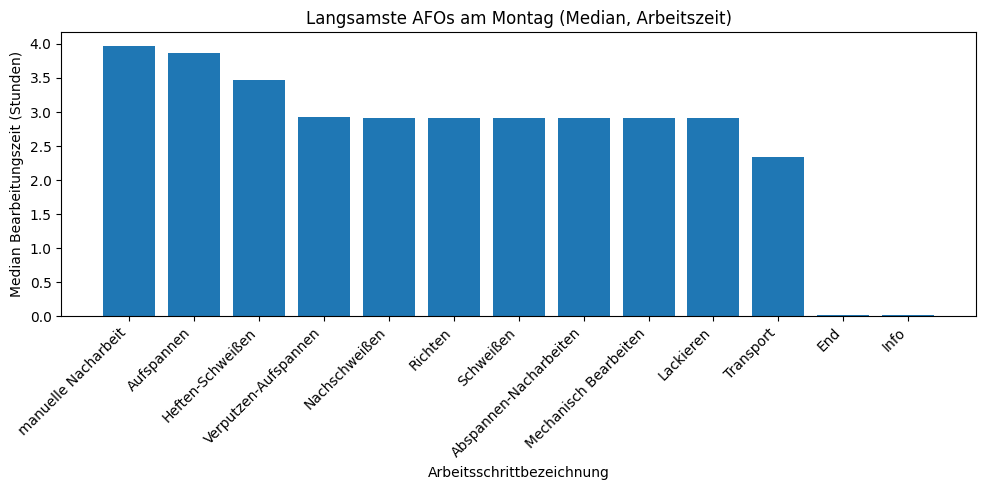

,Wochentag,Arbeitsschrittbezeichnung,median,mean,count
25,Monday,manuelle Nacharbeit,3.700000,3.972513,382
14,Monday,Aufspannen,2.966667,3.870179,5581
16,Monday,Heften-Schweißen,2.950000,3.466629,11513
24,Monday,Verputzen-Aufspannen,2.916667,2.919592,963
20,Monday,Nachschweißen,2.916667,2.918788,5925
21,Monday,Richten,2.916667,2.918078,8834
22,Monday,Schweißen,2.916667,2.916472,7540
13,Monday,Abspannen-Nacharbeiten,2.916667,2.916171,7323
19,Monday,Mechanisch Bearbeiten,2.916667,2.914165,4251
18,Monday,Lackieren,2.916667,2.910859,617


In [8]:
# WELCHER AFO sind MONTAGS DAFÜR SCHULD
data_monday = (
    data.groupby(["Wochentag", "Arbeitsschrittbezeichnung"])["AFO_Dauer_IST_Stunden"]
    .agg(median="median", mean="mean", count="count")
    .reset_index()
)

# Nur Montag
afo_monday = data_monday[data_monday["Wochentag"] == "Monday"].sort_values("mean", ascending=False)

plt.figure(figsize=(10,5))
plt.bar(afo_monday.head(20)["Arbeitsschrittbezeichnung"], afo_monday.head(100)["mean"])
plt.xticks(rotation=45, ha="right")
plt.title("Langsamste AFOs am Montag (Median, Arbeitszeit)")
plt.ylabel("Median Bearbeitungszeit (Stunden)")
plt.xlabel("Arbeitsschrittbezeichnung")
plt.tight_layout()
plt.show()

afo_monday.head(20)

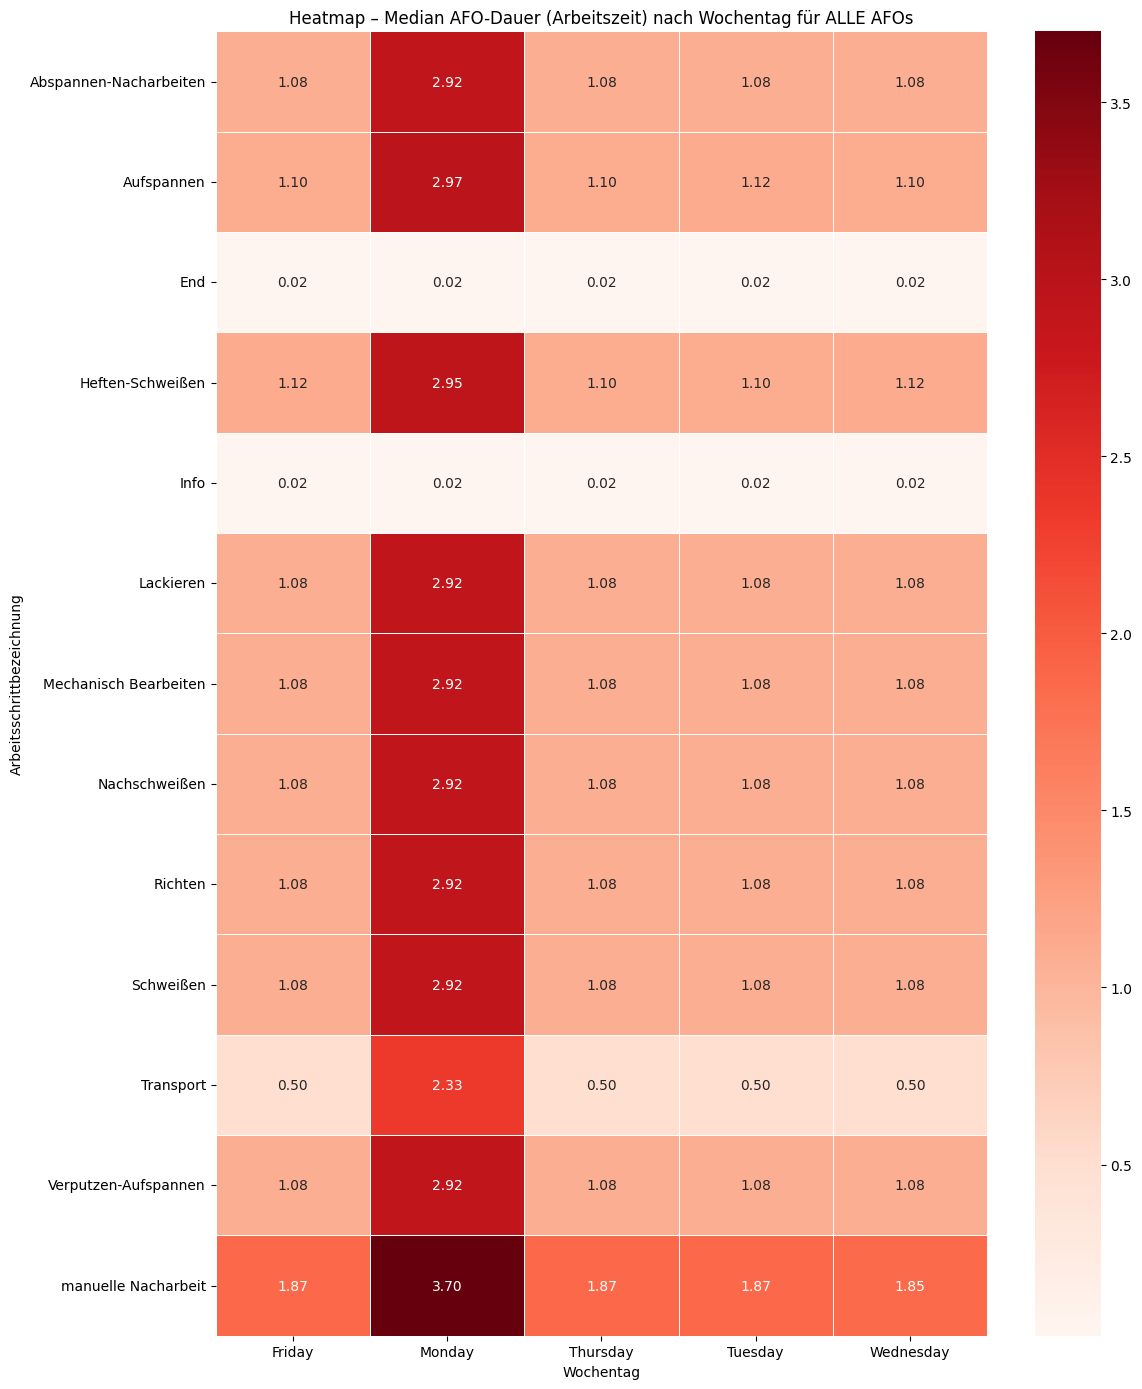

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gruppierung aller AFOs nach Wochentag (Median-Arbeitszeit)
heatmap_data = (
    data.groupby(["Arbeitsschrittbezeichnung", "Wochentag"])["AFO_Dauer_IST_Stunden"]
    .median()
    .unstack()            # Wochentage als Spalten
    .sort_index()         # AFOs alphabetisch
)

# Heatmap zeichnen mit Zahlen
plt.figure(figsize=(12, 14))
sns.heatmap(
    heatmap_data,
    annot=True,           
    fmt=".2f",            
    cmap="Reds",
    linewidths=0.5
)

plt.title("Heatmap – Median AFO-Dauer (Arbeitszeit) nach Wochentag für ALLE AFOs")
plt.xlabel("Wochentag")
plt.ylabel("Arbeitsschrittbezeichnung")
plt.tight_layout()
plt.show()

In [10]:
# Für alle Wochentage: AFOs nach durchschnittlicher Dauer sortiert
data_by_day = (
    data.groupby(["Wochentag", "Arbeitsschrittbezeichnung"])["AFO_Dauer_IST_Stunden"]
    .agg(median="median", mean="mean", count="count")
    .reset_index()
)

# Für besseren Überblick: nach Wochentag gruppieren und je Tag nach mean sortieren
for day in data_by_day["Wochentag"].unique():
    print(f"\n=== {day} ===")
    temp = data_by_day[data_by_day["Wochentag"] == day].sort_values("mean", ascending=False)
    display(temp.head(20))  # Top 20 pro Tag, kannst auf alle ändern mit .head(100) etc.


=== Friday ===


,Wochentag,Arbeitsschrittbezeichnung,median,mean,count
12,Friday,manuelle Nacharbeit,1.866667,2.100637,2720
3,Friday,Heften-Schweißen,1.116667,1.578877,13367
1,Friday,Aufspannen,1.100000,1.542905,16051
9,Friday,Schweißen,1.083333,1.084503,13562
6,Friday,Mechanisch Bearbeiten,1.083333,1.083610,16211
8,Friday,Richten,1.083333,1.082936,15963
7,Friday,Nachschweißen,1.083333,1.082269,14908
11,Friday,Verputzen-Aufspannen,1.083333,1.082154,1498
0,Friday,Abspannen-Nacharbeiten,1.083333,1.081469,17779
5,Friday,Lackieren,1.083333,1.079189,1464



=== Monday ===


,Wochentag,Arbeitsschrittbezeichnung,median,mean,count
25,Monday,manuelle Nacharbeit,3.700000,3.972513,382
14,Monday,Aufspannen,2.966667,3.870179,5581
16,Monday,Heften-Schweißen,2.950000,3.466629,11513
24,Monday,Verputzen-Aufspannen,2.916667,2.919592,963
20,Monday,Nachschweißen,2.916667,2.918788,5925
21,Monday,Richten,2.916667,2.918078,8834
22,Monday,Schweißen,2.916667,2.916472,7540
13,Monday,Abspannen-Nacharbeiten,2.916667,2.916171,7323
19,Monday,Mechanisch Bearbeiten,2.916667,2.914165,4251
18,Monday,Lackieren,2.916667,2.910859,617



=== Thursday ===


,Wochentag,Arbeitsschrittbezeichnung,median,mean,count
38,Thursday,manuelle Nacharbeit,1.866667,2.105435,2680
29,Thursday,Heften-Schweißen,1.100000,1.594400,13243
27,Thursday,Aufspannen,1.100000,1.547392,17355
31,Thursday,Lackieren,1.083333,1.085233,1500
33,Thursday,Nachschweißen,1.083333,1.084041,14794
34,Thursday,Richten,1.083333,1.083800,16792
37,Thursday,Verputzen-Aufspannen,1.083333,1.083598,1451
26,Thursday,Abspannen-Nacharbeiten,1.083333,1.083215,17893
32,Thursday,Mechanisch Bearbeiten,1.083333,1.082640,17700
35,Thursday,Schweißen,1.083333,1.082276,13444



=== Tuesday ===


,Wochentag,Arbeitsschrittbezeichnung,median,mean,count
51,Tuesday,manuelle Nacharbeit,1.866667,2.075077,4328
40,Tuesday,Aufspannen,1.116667,1.497084,20743
42,Tuesday,Heften-Schweißen,1.100000,1.480964,15111
48,Tuesday,Schweißen,1.083333,1.083524,18621
45,Tuesday,Mechanisch Bearbeiten,1.083333,1.083423,20720
39,Tuesday,Abspannen-Nacharbeiten,1.083333,1.082519,15116
46,Tuesday,Nachschweißen,1.083333,1.082505,14414
44,Tuesday,Lackieren,1.083333,1.081855,1792
47,Tuesday,Richten,1.083333,1.080622,18782
50,Tuesday,Verputzen-Aufspannen,1.083333,1.079633,1491



=== Wednesday ===


,Wochentag,Arbeitsschrittbezeichnung,median,mean,count
64,Wednesday,manuelle Nacharbeit,1.850000,2.069515,2996
55,Wednesday,Heften-Schweißen,1.116667,1.570844,13481
53,Wednesday,Aufspannen,1.100000,1.506082,19394
59,Wednesday,Nachschweißen,1.083333,1.085096,14418
60,Wednesday,Richten,1.083333,1.083986,18774
52,Wednesday,Abspannen-Nacharbeiten,1.083333,1.083940,18245
63,Wednesday,Verputzen-Aufspannen,1.083333,1.083624,1489
61,Wednesday,Schweißen,1.083333,1.083268,13611
58,Wednesday,Mechanisch Bearbeiten,1.083333,1.082282,20307
57,Wednesday,Lackieren,1.083333,1.077752,1517


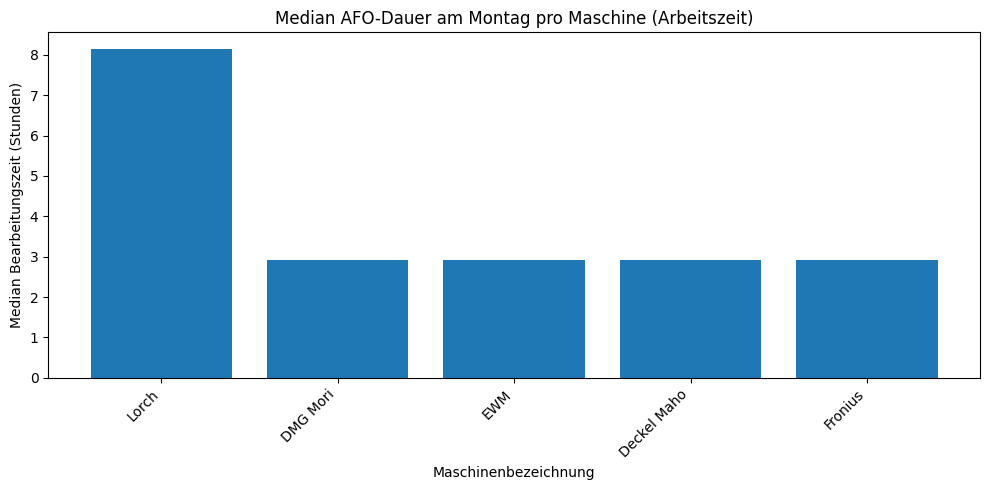

,median,mean,count
Maschinenbezeichnung,,,
Lorch,8.150000,8.164116,2222
DMG Mori,2.916667,2.918227,9797
EWM,2.916667,2.931467,15180
Deckel Maho,2.916667,2.917341,13248
Fronius,2.916667,2.929198,12482


In [11]:
# Für Montag gucken - welche Maschinen sind hier besonders langsam?
df_montag = data[
    (data["Wochentag"] == "Monday")
]

# Gruppierung nach Maschine → Median, Mean und Anzahl
maschine_montag = (
    df_montag
    .groupby("Maschinenbezeichnung")["AFO_Dauer_IST_Stunden"]
    .agg(median="median", mean="mean", count="count")
    .sort_values("median", ascending=False)
)

plt.figure(figsize=(10,5))
plt.bar(maschine_montag.index, maschine_montag["median"])
plt.xticks(rotation=45, ha="right")
plt.title("Median AFO-Dauer am Montag pro Maschine (Arbeitszeit)")
plt.ylabel("Median Bearbeitungszeit (Stunden)")
plt.xlabel("Maschinenbezeichnung")
plt.tight_layout()
plt.show()

maschine_montag

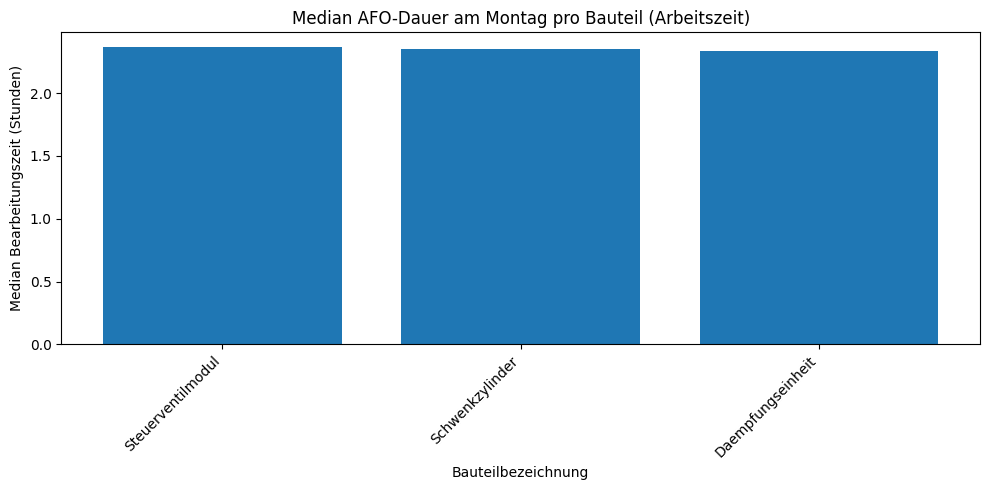

,median,mean,count
Bauteilbezeichnung,,,
Steuerventilmodul,2.366667,2.032503,76136
Schwenkzylinder,2.350000,1.959403,89293
Daempfungseinheit,2.333333,1.827872,6030


In [12]:
bauteil_montag = (
    df_montag.groupby("Bauteilbezeichnung")["AFO_Dauer_IST_Stunden"]
    .agg(median="median", mean="mean", count="count")
    .sort_values("median", ascending=False)
)

plt.figure(figsize=(10,5))
plt.bar(bauteil_montag.index, bauteil_montag["median"])
plt.xticks(rotation=45, ha="right")
plt.title("Median AFO-Dauer am Montag pro Bauteil (Arbeitszeit)")
plt.ylabel("Median Bearbeitungszeit (Stunden)")
plt.xlabel("Bauteilbezeichnung")
plt.tight_layout()
plt.show()

bauteil_montag

In [13]:
# Durchschnittliche Auslastung / Maschinenkapazität am Montag
lorch_monday = data[
    (data["Wochentag"] == "Monday") &
    (data["Maschinenbezeichnung"] == "Lorch")
]

avg_capacity = lorch_monday["Maschinenkapazität"].mean()

print("Durchschnittliche Lorch-Auslastung am Montag:", avg_capacity)

Durchschnittliche Lorch-Auslastung am Montag: 4.0


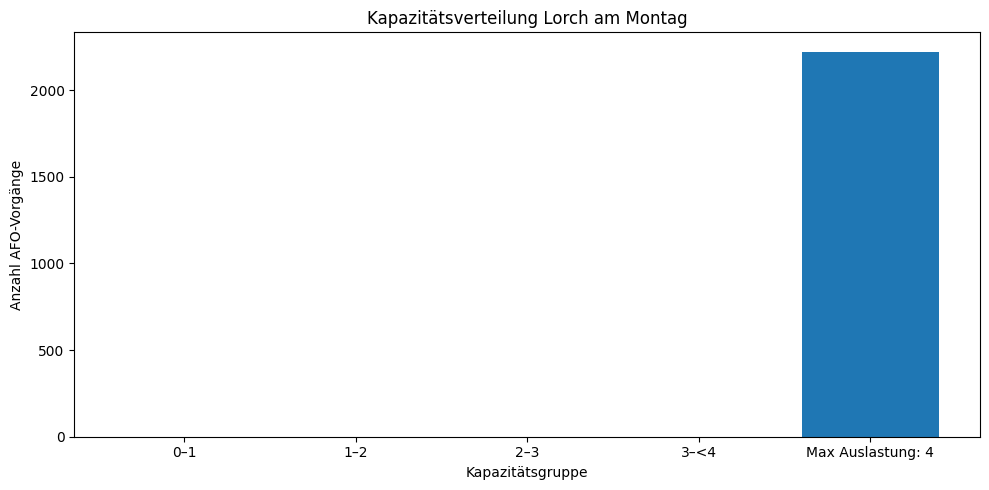

In [14]:
# Nur Lorch am Montag betrachten
lorch_monday = data[
    (data["Wochentag"] == "Monday") &
    (data["Maschinenbezeichnung"] == "Lorch") &
    (data["Maschinenkapazität"].notna())
].copy()

# Bins so definiert, dass "EXAKT 4" separat sichtbar wird
bins    = [0, 1, 2, 3, 3.9999, 4.0001]  # 4 exakt abgefangen
labels  = ["0–1", "1–2", "2–3", "3–<4", "Max Auslastung: 4"]

lorch_monday["cap_group_bins"] = pd.cut(
    lorch_monday["Maschinenkapazität"],
    bins=bins,
    labels=labels,
    right=False,  # wichtig: macht 4.0000 ausgeschlossen aus vorherigem Bin
    include_lowest=True
)

# Verteilung anschauen
cap_counts = lorch_monday["cap_group_bins"].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(cap_counts.index, cap_counts.values)
plt.title("Kapazitätsverteilung Lorch am Montag")
plt.xlabel("Kapazitätsgruppe")
plt.ylabel("Anzahl AFO-Vorgänge")
plt.tight_layout()
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528238 entries, 0 to 1528237
Data columns (total 28 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   AuftragsID                  1528238 non-null  object        
 1   BauteilID                   1528238 non-null  int64         
 2   Bauteilbezeichnung          1528238 non-null  object        
 3   Auftragseingang             1528238 non-null  datetime64[ns]
 4   Priorität                   1528238 non-null  int64         
 5   Auftragsende_SOLL           1528238 non-null  datetime64[ns]
 6   Arbeitsschritt              1528238 non-null  int64         
 7   Arbeitsschrittbezeichnung   1528238 non-null  object        
 8   AFO_Start_SOLL              1528238 non-null  datetime64[ns]
 9   AFO_Ende_SOLL               1528238 non-null  datetime64[ns]
 10  AFO_Start_IST               1528238 non-null  datetime64[ns]
 11  AFO_Ende_IST            

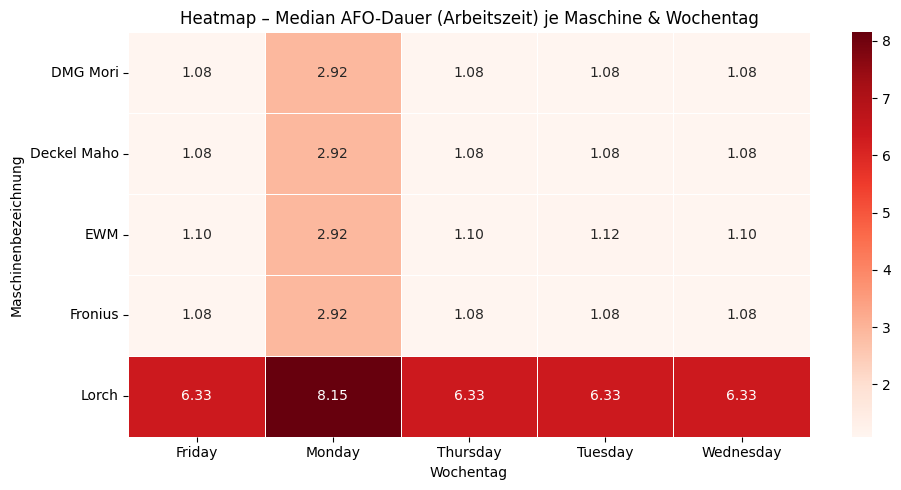

,Maschinenbezeichnung,Wochentag,median,mean,count
0,DMG Mori,Friday,1.083333,1.082868,17461
1,DMG Mori,Monday,2.916667,2.918227,9797
2,DMG Mori,Thursday,1.083333,1.083784,18243
3,DMG Mori,Tuesday,1.083333,1.080549,20273
4,DMG Mori,Wednesday,1.083333,1.083959,20263
5,Deckel Maho,Friday,1.083333,1.081834,32687
6,Deckel Maho,Monday,2.916667,2.917341,13248
7,Deckel Maho,Thursday,1.083333,1.083589,32687
8,Deckel Maho,Tuesday,1.083333,1.082512,29530
9,Deckel Maho,Wednesday,1.083333,1.084450,32663


In [16]:
maschine_wochentag = (
    data.groupby(["Maschinenbezeichnung", "Wochentag"])["AFO_Dauer_IST_Stunden"]
    .agg(median="median", mean="mean", count="count")  
    .reset_index()
    .sort_values(["Maschinenbezeichnung", "Wochentag"])
)


heatmap_data = (
    data.groupby(["Maschinenbezeichnung", "Wochentag"])["AFO_Dauer_IST_Stunden"]
    .median()
    .unstack()       # Wochentage = Spalten
)

# Heatmap zeichnen
plt.figure(figsize=(10, 5))
sns.heatmap(
    heatmap_data,
    annot=True,       # Zahlen einblenden
    fmt=".2f",        # 1 Nachkommastelle
    cmap="Reds",      # Rot = kritisch
    linewidths=0.5
)

plt.title("Heatmap – Median AFO-Dauer (Arbeitszeit) je Maschine & Wochentag")
plt.xlabel("Wochentag")
plt.ylabel("Maschinenbezeichnung")
plt.tight_layout()
plt.show()

maschine_wochentag

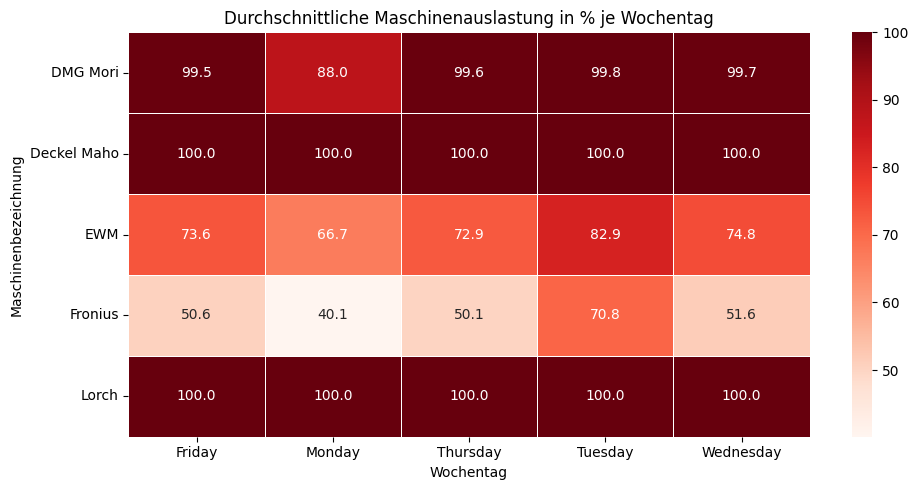

In [17]:
# Max-Kapazitäten lt. Aufgabenstellung
max_capacity = {
    "EWM": 18,
    "Fronius": 25,
    "Deckel Maho": 8,
    "DMG Mori": 8,
    "Lorch": 4
}

# Durchschnittliche IST-Kapazität je Maschine und Wochentag
df_cap = (
    data.groupby(["Maschinenbezeichnung", "Wochentag"])["Maschinenkapazität"]
    .mean()
    .reset_index()
)

# Prozentuale Auslastung berechnen
df_cap["Auslastung_%"] = df_cap.apply(
    lambda x: (x["Maschinenkapazität"] / max_capacity.get(x["Maschinenbezeichnung"], 1)) * 100,
    axis=1
)

# Als Heatmap vorbereiten (Maschine = Zeile, Wochentag = Spalte)
heatmap_cap = df_cap.pivot(
    index="Maschinenbezeichnung",
    columns="Wochentag",
    values="Auslastung_%"
)

# Heatmap zeichnen
plt.figure(figsize=(10, 5))
sns.heatmap(
    heatmap_cap,
    annot=True,
    fmt=".1f",
    cmap="Reds",
    linewidths=0.5
)
plt.title("Durchschnittliche Maschinenauslastung in % je Wochentag")
plt.xlabel("Wochentag")
plt.ylabel("Maschinenbezeichnung")
plt.tight_layout()
plt.show()

In [18]:
# Wie lange brauchen alle AFOs auf Lorch je Wochentag?
kritische_afos = ["Aufspannen", "Heften-Schweißen"]

vergleich = (
    data[
        (data["Maschinenbezeichnung"] == "Lorch") &
        (data["Arbeitsschrittbezeichnung"].isin(kritische_afos))
    ]
    .groupby(["Wochentag", "Arbeitsschrittbezeichnung"])["AFO_Dauer_IST_Stunden"]
    .agg(median="median", mean="mean", count="count")
    .sort_values(["Arbeitsschrittbezeichnung", "median"], ascending=False)
)

vergleich

,,median,mean,count
Wochentag,Arbeitsschrittbezeichnung,,,
Monday,Heften-Schweißen,8.150000,8.158196,1210
Friday,Heften-Schweißen,6.350000,6.341203,1258
Wednesday,Heften-Schweißen,6.333333,6.331575,1251
Tuesday,Heften-Schweißen,6.333333,6.336220,1143
Thursday,Heften-Schweißen,6.316667,6.329391,1298
Monday,Aufspannen,8.166667,8.171196,1012
Friday,Aufspannen,6.333333,6.327703,1412
Thursday,Aufspannen,6.333333,6.333159,1533
Tuesday,Aufspannen,6.333333,6.326965,1633


In [19]:
vergleich_startdelay = (
    data[
        (data["Maschinenbezeichnung"] == "Lorch") &
        (data["Arbeitsschrittbezeichnung"].isin(["Aufspannen", "Heften-Schweißen"]))
    ]
    .groupby(["Wochentag", "Arbeitsschrittbezeichnung"])["Start_Delay_Arbeitszeit"]
    .agg(median="median", mean="mean", count="count")
    .sort_values(["Arbeitsschrittbezeichnung", "median"], ascending=False)
)

vergleich_startdelay

,,median,mean,count
Wochentag,Arbeitsschrittbezeichnung,,,
Friday,Heften-Schweißen,358.816667,308.075252,1258
Wednesday,Heften-Schweißen,358.333333,301.386278,1251
Monday,Heften-Schweißen,355.408333,305.377741,1210
Thursday,Heften-Schweißen,351.125000,299.937018,1298
Tuesday,Heften-Schweißen,325.216667,272.780723,1143
Monday,Aufspannen,462.025000,411.893709,1012
Friday,Aufspannen,378.091667,327.201334,1412
Thursday,Aufspannen,362.466667,311.659198,1533
Wednesday,Aufspannen,337.800000,283.898553,1567


In [20]:
kritische_afos = ["Aufspannen", "Heften-Schweißen"]

prio_analysis = (
    data[
        (data["Maschinenbezeichnung"] == "Lorch") &
        (data["Arbeitsschrittbezeichnung"].isin(kritische_afos)) &
        (data["Start_Delay_Arbeitszeit"] > 0) 
    ]
    .groupby("Priorität")
    .size()
    .reset_index(name="Anzahl")
    .sort_values("Priorität", ascending=True)
)

prio_analysis

,Priorität,Anzahl
0,1,9406
1,2,2255
2,3,1036


In [21]:
kritische_afos = ["Aufspannen", "Heften-Schweißen"]

# Basis: alle Lorch-Vorgänge der kritischen AFOs
basis = data[
    (data["Maschinenbezeichnung"] == "Lorch") &
    (data["Arbeitsschrittbezeichnung"].isin(kritische_afos))
]

# Verteilung Priorität: gesamt vs. im Rückstau (Startdelay > 0)
dist_total = basis["Priorität"].value_counts().sort_index()
dist_delay = basis[basis["Start_Delay_Arbeitszeit"] > 0]["Priorität"].value_counts().sort_index()

prop_total = (dist_total / dist_total.sum() * 100).round(2)
prop_delay = (dist_delay / dist_delay.sum() * 100).round(2)

# Optional: nebeneinander
vergleich = pd.concat([prop_total.rename("gesamt_%"), prop_delay.rename("verzug_%")], axis=1)
vergleich["diff_pp"] = (vergleich["verzug_%"] - vergleich["gesamt_%"]).round(2)
print("\nVergleich (Prozentpunkte-Differenz):")
display(vergleich)


Vergleich (Prozentpunkte-Differenz):


,gesamt_%,verzug_%,diff_pp
Priorität,,,
1,70.63,74.08,3.45
2,19.35,17.76,-1.59
3,10.02,8.16,-1.86


# Prüfen wie groß Puffer ist von JUST IN TIME (Ob Produkt vorher gemacht wird bevor es raus geht)

In [22]:
# Pufferzeit in Stunden zwischen IST-Fertigstellung und SOLL-Endtermin
data["Puffer_IST_zu_SOLL_h"] = (
    (data["AFO_Ende_SOLL"] - data["AFO_Ende_IST_Letzter"])
    .dt.total_seconds() / 3600
)

data[["AuftragsID", "Wochentag", "AFO_Ende_IST_Letzter", "Auftragsende_SOLL", "Puffer_IST_zu_SOLL_h"]].head(100)

,AuftragsID,Wochentag,AFO_Ende_IST_Letzter,Auftragsende_SOLL,Puffer_IST_zu_SOLL_h
0,95a859f51cf541e0b4aed3a38bb93065,Wednesday,2014-05-07 12:19:00,2014-01-01 11:32:00,-3029.300000
1,ed4e40cb93c04d0f9bcb8f7ecdc8752a,Wednesday,2014-05-08 08:21:00,2014-01-01 11:32:00,-3049.333333
2,ce233ad078b9429b8bd40f09100e8ee0,Wednesday,2014-05-07 13:15:00,2014-01-01 11:32:00,-3030.233333
3,c6b0430e1b7b4f328f0ac195c3070390,Wednesday,2014-05-07 13:20:00,2014-01-01 11:32:00,-3030.316667
4,5a5b4b41d6d246cfbe862018b557702b,Wednesday,2014-05-07 12:14:00,2014-01-01 11:32:00,-3029.216667
...,...,...,...,...,...
95,20f20431e1ff4fa598eb011c0ca61981,Wednesday,2014-05-07 13:17:00,2014-01-01 13:12:00,-3028.933333
96,35790e743a4c4fa2967e3c1c3f2bd3b8,Wednesday,2014-01-01 13:40:00,2014-01-01 13:12:00,-5.316667
97,e1f177458ea84d6b9b33813a21ef95ad,Wednesday,2014-01-01 12:32:00,2014-01-01 12:22:00,-4.183333
98,c6b0430e1b7b4f328f0ac195c3070390,Wednesday,2014-05-07 13:20:00,2014-01-01 11:32:00,-3028.983333


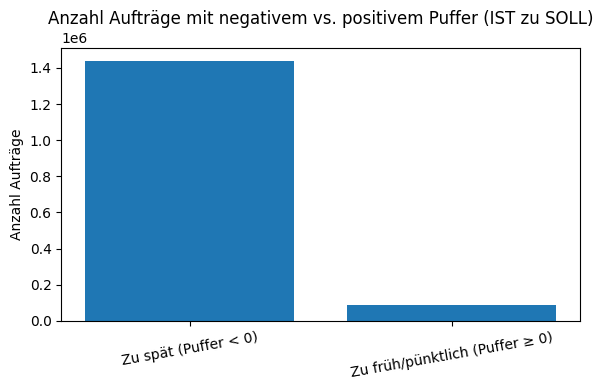

Puffer_Status
Zu spät (Puffer < 0)              1440980
Zu früh/pünktlich (Puffer ≥ 0)      87258
Name: count, dtype: int64

In [23]:

data["Puffer_Status"] = data["Puffer_IST_zu_SOLL_h"].apply(
    lambda x: "Zu spät (Puffer < 0)" if x < 0 else "Zu früh/pünktlich (Puffer ≥ 0)"
)

counts = data["Puffer_Status"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.title("Anzahl Aufträge mit negativem vs. positivem Puffer (IST zu SOLL)")
plt.ylabel("Anzahl Aufträge")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

counts

In [24]:
zufrueh = data[data["Puffer_IST_zu_SOLL_h"] >= 0]

zufrueh.head(100)

,AuftragsID,BauteilID,Bauteilbezeichnung,Auftragseingang,Priorität,Auftragsende_SOLL,Arbeitsschritt,Arbeitsschrittbezeichnung,AFO_Start_SOLL,AFO_Ende_SOLL,...,Start_Delay_Arbeitszeit,End_Delay_Arbeitszeit,AFO_Erster_Schritt,AFO_Letzter_Schritt,AFO_Start_IST_Erster,AFO_Ende_IST_Letzter,Auftrags_Laufzeit_IST_Tage,Wochentag,Puffer_IST_zu_SOLL_h,Puffer_Status
292,7c387875ac164afaa623e0ddb66c9c0d,1,Steuerventilmodul,2013-09-06,2,2014-01-01 12:22:00,100,Transport,2014-01-01 11:51:00,2014-01-01 12:21:00,...,0.0,0.0,1,999,2014-01-01 07:00:00,2014-01-01 12:17:00,0.220139,Wednesday,0.066667,Zu früh/pünktlich (Puffer ≥ 0)
294,7c387875ac164afaa623e0ddb66c9c0d,1,Steuerventilmodul,2013-09-06,2,2014-01-01 12:22:00,999,End,2014-01-01 12:21:00,2014-01-01 12:22:00,...,0.0,0.0,1,999,2014-01-01 07:00:00,2014-01-01 12:17:00,0.220139,Wednesday,0.083333,Zu früh/pünktlich (Puffer ≥ 0)
295,34f076a2556e4eb9a1ecd067b960acf5,1,Steuerventilmodul,2013-07-24,3,2014-01-01 12:22:00,100,Transport,2014-01-01 11:51:00,2014-01-01 12:21:00,...,0.0,0.0,1,999,2014-01-01 07:00:00,2014-01-01 12:19:00,0.221528,Wednesday,0.033333,Zu früh/pünktlich (Puffer ≥ 0)
297,34f076a2556e4eb9a1ecd067b960acf5,1,Steuerventilmodul,2013-07-24,3,2014-01-01 12:22:00,999,End,2014-01-01 12:21:00,2014-01-01 12:22:00,...,0.0,0.0,1,999,2014-01-01 07:00:00,2014-01-01 12:19:00,0.221528,Wednesday,0.050000,Zu früh/pünktlich (Puffer ≥ 0)
320,994db465d85a49fa834aa93fe381a45e,1,Steuerventilmodul,2013-08-23,2,2014-01-01 13:12:00,100,Transport,2014-01-01 12:41:00,2014-01-01 13:11:00,...,0.0,0.0,1,999,2014-01-01 07:00:00,2014-01-01 12:54:00,0.245833,Wednesday,0.283333,Zu früh/pünktlich (Puffer ≥ 0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,0588004335d54262b18cd828e308ec7c,2,Schwenkzylinder,2013-12-24,3,2014-01-10 11:02:00,42,Abspannen-Nacharbeiten,2014-01-09 13:11:00,2014-01-10 10:31:00,...,0.0,0.0,1,999,2014-01-09 07:00:00,2014-01-09 14:23:00,0.307639,Thursday,20.133333,Zu früh/pünktlich (Puffer ≥ 0)
3876,01098c81dee347268335aea42be4898a,2,Schwenkzylinder,2013-11-04,2,2014-01-10 11:02:00,100,Transport,2014-01-10 10:31:00,2014-01-10 11:01:00,...,0.0,0.0,1,999,2014-01-09 07:00:00,2014-01-09 14:16:00,0.302778,Thursday,20.750000,Zu früh/pünktlich (Puffer ≥ 0)
3877,01098c81dee347268335aea42be4898a,2,Schwenkzylinder,2013-11-04,2,2014-01-10 11:02:00,999,End,2014-01-10 11:01:00,2014-01-10 11:02:00,...,0.0,0.0,1,999,2014-01-09 07:00:00,2014-01-09 14:16:00,0.302778,Thursday,20.766667,Zu früh/pünktlich (Puffer ≥ 0)
3880,2ed09fd824074879acafd22f4e031150,2,Schwenkzylinder,2013-08-26,2,2014-01-10 10:12:00,100,Transport,2014-01-10 09:41:00,2014-01-10 10:11:00,...,0.0,0.0,1,999,2014-01-09 07:00:00,2014-01-09 14:18:00,0.304167,Thursday,19.883333,Zu früh/pünktlich (Puffer ≥ 0)


In [25]:
prioritaets_verteilung = zufrueh["Priorität"].value_counts().sort_index()

print("Prioritätenverteilung der Aufträge mit Puffer >= 0")
display(prioritaets_verteilung)


zuspaet = data[data["Puffer_IST_zu_SOLL_h"] < 0]
prioritaets_verteilung = zuspaet["Priorität"].value_counts().sort_index()
print("Prioritätenverteilung der Aufträge mit Puffer < 0")
display(prioritaets_verteilung)


Prioritätenverteilung der Aufträge mit Puffer >= 0


Priorität
1      517
2    51763
3    34978
Name: count, dtype: int64

Prioritätenverteilung der Aufträge mit Puffer < 0


Priorität
1    1063724
2     256683
3     120573
Name: count, dtype: int64

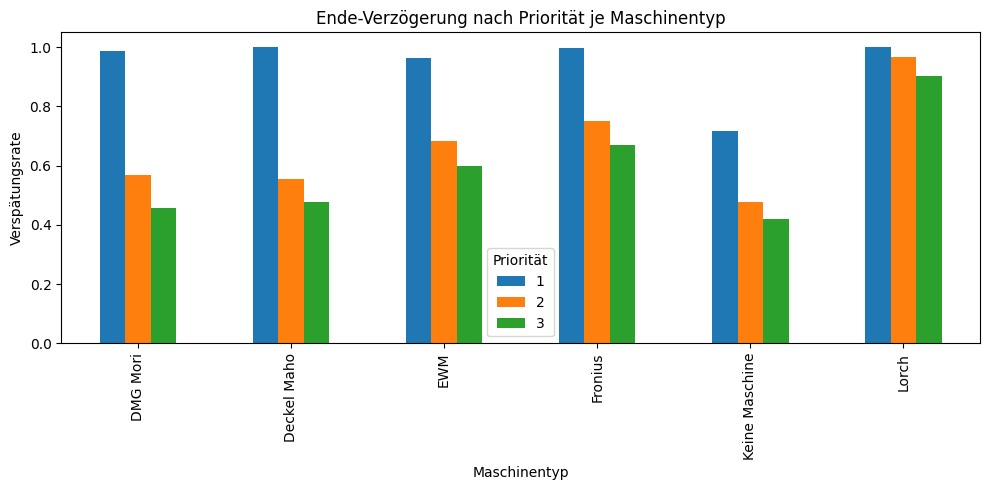

In [45]:
# 1) Tardy (Verspätung) Flag aus deiner fertigen Logik
data["tardy"] = data["End_Delay_Arbeitszeit"] > 0

# 2) Gruppieren + Pivot für sauberes Diagramm
prio_machine = (
    data
    .groupby(["Maschinenbezeichnung", "Priorität"])
    .agg(tardy_rate=("tardy", "mean"))
    .reset_index()
)

pivot = prio_machine.pivot(
    index="Maschinenbezeichnung",
    columns="Priorität",
    values="tardy_rate"
)

# 3) Balkendiagramm — ohne Farben zu setzen (matplotlib default)
pivot.plot(kind="bar", figsize=(10, 5))
plt.title("Ende-Verzögerung nach Priorität je Maschinentyp")
plt.xlabel("Maschinentyp")
plt.ylabel("Verspätungsrate")
plt.tight_layout()
plt.show()

# Prio AnalyseFinal

In [53]:
startdelay_by_prio = (
    data[data["Start_Delay_Arbeitszeit"] > 0]
    .groupby("Priorität")["Start_Delay_Arbeitszeit"]
    .median()
    .sort_index()
)

enddelay_by_prio = (
    data[data["End_Delay_Arbeitszeit"] > 0]
    .groupby("Priorität")["End_Delay_Arbeitszeit"]
    .median()
    .sort_index()
)

print("=== MEDIAN STARTVERZÖGERUNG (in h) je Priorität ===")
print(startdelay_by_prio)
print("\n=== MEDIAN ENDVERZÖGERUNG (in h) je Priorität ===")
print(enddelay_by_prio)

=== MEDIAN STARTVERZÖGERUNG (in h) je Priorität ===
Priorität
1    15.633333
2     1.766667
3     1.066667
Name: Start_Delay_Arbeitszeit, dtype: float64

=== MEDIAN ENDVERZÖGERUNG (in h) je Priorität ===
Priorität
1    12.600000
2     1.716667
3     1.216667
Name: End_Delay_Arbeitszeit, dtype: float64


In [54]:
startdelay_prio_machine = (
    data[data["Start_Delay_Arbeitszeit"] > 0]
    .groupby(["Maschinenbezeichnung", "Priorität"])["Start_Delay_Arbeitszeit"]
    .median()
    .unstack()
    .sort_index()
)

enddelay_prio_machine = (
    data[data["End_Delay_Arbeitszeit"] > 0]
    .groupby(["Maschinenbezeichnung", "Priorität"])["End_Delay_Arbeitszeit"]
    .median()
    .unstack()
    .sort_index()
)

print("=== MEDIAN Startverzögerung (h) je Maschine × Priorität ===")
print(startdelay_prio_machine)
print("\n=== MEDIAN Endverzögerung (h) je Maschine × Priorität ===")
print(enddelay_prio_machine)


=== MEDIAN Startverzögerung (h) je Maschine × Priorität ===
Priorität                       1         2         3
Maschinenbezeichnung                                 
DMG Mori                 9.716667  2.200000  1.016667
Deckel Maho           1655.050000  2.200000  1.250000
EWM                      4.850000  1.450000  0.900000
Fronius                  5.016667  1.083333  0.716667
Keine Maschine          21.033333  1.733333  1.183333
Lorch                  458.341667  3.016667  1.950000

=== MEDIAN Endverzögerung (h) je Maschine × Priorität ===
Priorität                       1         2         3
Maschinenbezeichnung                                 
DMG Mori                 5.066667  1.033333  0.500000
Deckel Maho           1653.266667  2.500000  1.633333
EWM                      3.633333  0.833333  0.583333
Fronius                  5.583333  1.266667  0.933333
Keine Maschine          16.716667  1.816667  1.516667
Lorch                  463.883333  8.033333  6.716667


In [58]:
engpass = ["Deckel Maho", "Lorch"]

data["maschine_typ"] = data["Maschinenbezeichnung"].isin(engpass).map({
    True: "ENGPASS (DM / Lorch)",
    False: "NICHT-ENGPASS"
})

vergleich = (
    data[data["Start_Delay_Arbeitszeit"] > 0]
    .groupby(["maschine_typ", "Priorität"])["Start_Delay_Arbeitszeit"]
    .median()
    .unstack()
)

print("=== MEDIAN STARTVERZÖGERUNG (h) je Priorität — getrennt nach Engpass vs Nicht-Engpass ===")
print(vergleich)


=== MEDIAN STARTVERZÖGERUNG (h) je Priorität — getrennt nach Engpass vs Nicht-Engpass ===
Priorität                   1         2         3
maschine_typ                                     
ENGPASS (DM / Lorch)  1629.45  2.316667  1.316667
NICHT-ENGPASS           10.65  1.700000  1.033333


# Lorch Maschine

In [27]:
# Durchschnittliche Verspätung je Maschinenbezeichnung
verspaetung_maschine = (
    data.groupby("Maschinenbezeichnung")["AFO_Verspätung_Arbeitszeit"]
    .mean()
    .sort_values(ascending=False)
)

verspaetung_maschine

Maschinenbezeichnung
Lorch          5.284098
Fronius        0.441534
EWM            0.067464
DMG Mori      -3.639556
Deckel Maho   -4.553123
Name: AFO_Verspätung_Arbeitszeit, dtype: float64

In [29]:
# Nur echte Verspätungen berücksichtigen (keine negativen Werte = keine Vorproduktion)
data_verspaetet = data[data["AFO_Verspätung_Arbeitszeit"] > 0]

verspaetung_maschine_summe = (
    data_verspaetet.groupby("Maschinenbezeichnung")["AFO_Verspätung_Arbeitszeit"]
    .sum()
    .sort_values(ascending=False)
)

gesamt_verspaetung = verspaetung_maschine_summe.sum()

verspaetung_maschine_anteil = (
    (verspaetung_maschine_summe / gesamt_verspaetung) * 100
).round(2)

print("SUMME ECHTER VERSCHLEPPUNG JE MASCHINE (h):")
print(verspaetung_maschine_summe)

print("\nANTEIL DER ECHTEN VERSPÄTUNG AN GESAMT [%]:")
print(verspaetung_maschine_anteil)

SUMME ECHTER VERSCHLEPPUNG JE MASCHINE (h):
Maschinenbezeichnung
Lorch          71179.183333
Fronius        68490.950000
EWM            68214.483333
Deckel Maho    20512.100000
DMG Mori       12965.683333
Name: AFO_Verspätung_Arbeitszeit, dtype: float64

ANTEIL DER ECHTEN VERSPÄTUNG AN GESAMT [%]:
Maschinenbezeichnung
Lorch          29.49
Fronius        28.38
EWM            28.26
Deckel Maho     8.50
DMG Mori        5.37
Name: AFO_Verspätung_Arbeitszeit, dtype: float64


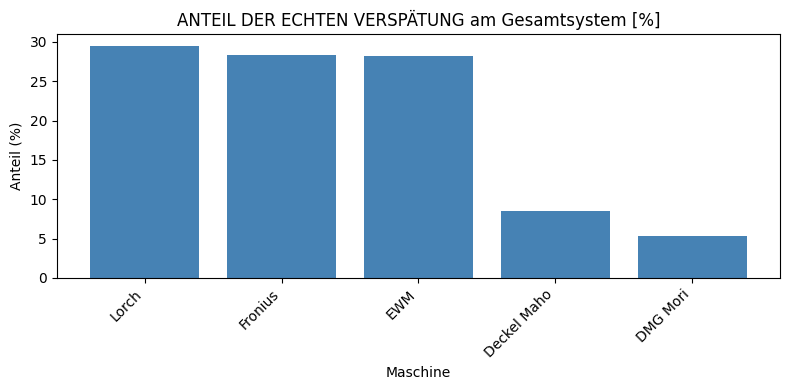

In [42]:

# Balkendiagramm – Anteil an Gesamtverspätung
plt.figure(figsize=(8,4))
plt.bar(verspaetung_maschine_anteil.index, verspaetung_maschine_anteil.values, color="steelblue")
plt.title("ANTEIL DER ECHTEN VERSPÄTUNG am Gesamtsystem [%]")
plt.ylabel("Anteil (%)")
plt.xlabel("Maschine")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [30]:
# Sicherstellen, dass leere Maschinenbezeichnungen als 'Keine Maschine' markiert sind
data["Maschinenbezeichnung"] = data["Maschinenbezeichnung"].fillna("Keine Maschine")

maschine_bauteil_schritt = (
    data.groupby(["Bauteilbezeichnung", "Arbeitsschrittbezeichnung", "Maschinenbezeichnung"])
    .agg(
        anzahl_vorkommen=("AuftragsID", "count"),  # oder .size()
        AFO_Verspätung_Arbeitszeit_mean=("AFO_Verspätung_Arbeitszeit", "mean"),
        AFO_Verspätung_Arbeitszeit_sum=("AFO_Verspätung_Arbeitszeit", "sum"),
        AFO_DAUER_MEAN=("AFO_Dauer_IST_Stunden", "mean"),
        AFO_DAUER_SUM=("AFO_Dauer_IST_Stunden", "sum")
    )
    .reset_index()
    .sort_values(
        ["Bauteilbezeichnung", "Arbeitsschrittbezeichnung", "anzahl_vorkommen"],
        ascending=[True, True, False]
    )
)
maschine_bauteil_schritt

,Bauteilbezeichnung,Arbeitsschrittbezeichnung,Maschinenbezeichnung,anzahl_vorkommen,AFO_Verspätung_Arbeitszeit_mean,AFO_Verspätung_Arbeitszeit_sum,AFO_DAUER_MEAN,AFO_DAUER_SUM
0,Daempfungseinheit,End,Keine Maschine,6890,5.031292e-16,3.466560e-12,0.016667,114.833333
1,Daempfungseinheit,Info,Keine Maschine,6888,0.000000e+00,0.000000e+00,0.016667,114.800000
2,Daempfungseinheit,Lackieren,Fronius,6890,4.114296e-01,2.834750e+03,1.244908,8577.416667
3,Daempfungseinheit,Transport,Keine Maschine,20672,2.280089e-01,4.713400e+03,0.728009,15049.400000
4,Daempfungseinheit,Verputzen-Aufspannen,DMG Mori,6892,-2.349509e+00,-1.619282e+04,1.338970,9228.183333
5,Daempfungseinheit,manuelle Nacharbeit,Fronius,2262,3.352350e+00,7.583017e+03,3.369017,7620.716667
6,Schwenkzylinder,Abspannen-Nacharbeiten,Deckel Maho,76356,-4.107145e+00,-3.136052e+05,1.258635,96104.350000
7,Schwenkzylinder,Aufspannen,EWM,71967,2.320469e-01,1.669972e+04,1.199467,86322.050000
8,Schwenkzylinder,Aufspannen,Lorch,7157,5.635792e+00,4.033537e+04,6.589428,47160.533333
9,Schwenkzylinder,End,Keine Maschine,76366,2.905892e-16,2.219114e-11,0.016667,1272.766667


In [31]:
# Nutzungshäufigkeit je Maschine (Anzahl aller AFOs)
nutzung = (
    data["Maschinenbezeichnung"]
    .value_counts()
    .rename("Anzahl_AFOs")
)

# Verspätung (nur echte) noch einmal:
verspaetung = (
    data[data["AFO_Verspätung_Arbeitszeit"] > 0]
    .groupby("Maschinenbezeichnung")["AFO_Verspätung_Arbeitszeit"]
    .sum()
    .rename("Summe_Verspätung_h")
)

# Zusammenführen in eine Vergleichstabelle
vergleich = pd.concat([nutzung, verspaetung], axis=1).fillna(0)
vergleich["Ø_Verspätung_pro_AFO_h"] = vergleich["Summe_Verspätung_h"] / vergleich["Anzahl_AFOs"]
vergleich = vergleich.sort_values("Summe_Verspätung_h", ascending=False)

vergleich

,Anzahl_AFOs,Summe_Verspätung_h,Ø_Verspätung_pro_AFO_h
Maschinenbezeichnung,,,
Keine Maschine,989584,141610.483333,0.143101
Lorch,13317,71179.183333,5.344986
Fronius,155119,68490.950000,0.441538
EWM,143366,68214.483333,0.475807
Deckel Maho,140815,20512.100000,0.145667
DMG Mori,86037,12965.683333,0.150699


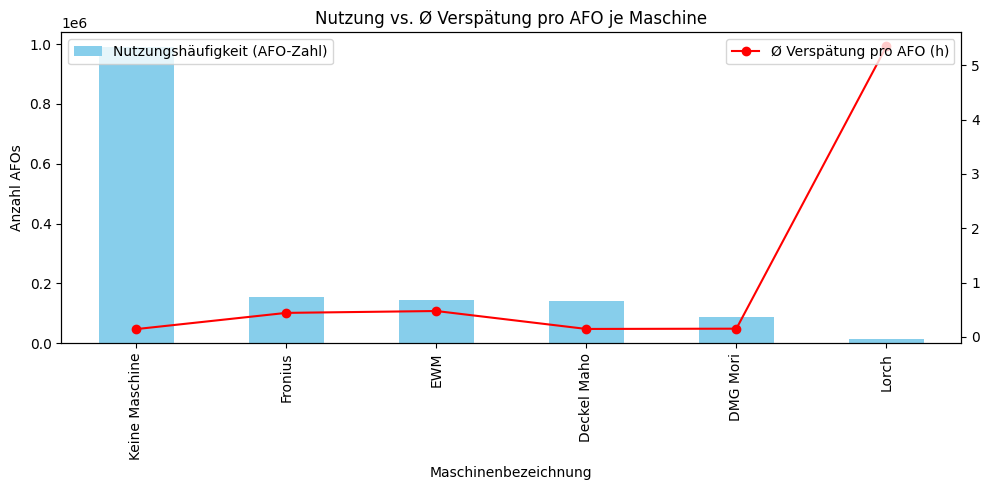

In [40]:
# Nutzungshäufigkeit je Maschine (Anzahl aller AFOs)
nutzung = (
    data["Maschinenbezeichnung"]
    .value_counts()
    .rename("Anzahl_AFOs")
)

# Verspätung (nur echte) je Maschine
verspaetung = (
    data[data["AFO_Verspätung_Arbeitszeit"] > 0]
    .groupby("Maschinenbezeichnung")["AFO_Verspätung_Arbeitszeit"]
    .sum()
    .rename("Summe_Verspätung_h")
)

# Zusammenführen
vergleich = pd.concat([nutzung, verspaetung], axis=1).fillna(0)
vergleich["Ø_Verspätung_pro_AFO_h"] = vergleich["Summe_Verspätung_h"] / vergleich["Anzahl_AFOs"]

# Plot
plt.figure(figsize=(10,5))
ax = vergleich["Anzahl_AFOs"].plot(kind="bar", color="skyblue", label="Nutzungshäufigkeit (AFO-Zahl)")
ax.set_ylabel("Anzahl AFOs")

# zweite Achse overlayen
ax2 = ax.twinx()
ax2.plot(vergleich.index, vergleich["Ø_Verspätung_pro_AFO_h"], color="red", marker="o", label="Ø Verspätung pro AFO (h)")

plt.title("Nutzung vs. Ø Verspätung pro AFO je Maschine")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()